In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset=pd.read_csv("twitter_data.csv")


In [3]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
dataset.isnull().sum()


Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
dataset["labels"]=dataset["class"].map({0 :"Hate Speech",
                                        1  : "Offesive language",
                                        2  : "No hate or offensive language"})

In [7]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offesive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offesive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offesive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offesive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offesive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offesive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offesive language


In [8]:
data=dataset[["tweet","labels"]]

In [9]:
data


,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offesive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offesive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offesive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offesive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offesive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offesive language
24781,youu got wild bitches tellin you lies,Offesive language


In [38]:
import re
import nltk
import string


In [39]:
#import stopwords
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))

In [40]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [42]:
stemmer = nltk.SnowballStemmer("english")

In [43]:
#datacleaning
def clean_data(text):
    text=str(text).lower()
    text=re.sub('http?:\S|www.\.S+','',text)
    text=re.sub('\[.*?],','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w\d\w','',text)
    #stopwords removal
    text=[word for word in text.split(' ')if word not in stopwords]
    text=" ".join(text)
    #streaming
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [44]:
sample=" Let's unite and kill all the people who are protesting again the government"
sammple=clean_data(sample)
sample

" Let's unite and kill all the people who are protesting again the government"

In [45]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offesive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offesive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offesive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offesive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offesive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offesive language
24781,youu got wild bitches tellin you lies,Offesive language


In [46]:
x=np.array(data["tweet"])
y=np.array(data["labels"])

In [47]:
x

array(["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
       '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
       '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit',
       ...,
       'young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again',
       'youu got wild bitches tellin you lies',
       '~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB'],
      dtype=object)

In [48]:
y

array(['No hate or offensive language', 'Offesive language',
       'Offesive language', ..., 'Offesive language', 'Offesive language',
       'No hate or offensive language'], dtype=object)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [50]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [51]:
x

<24783x35852 sparse matrix of type '<class 'numpy.int64'>'
	with 324058 stored elements in Compressed Sparse Row format>

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [53]:
x_train

<16604x35852 sparse matrix of type '<class 'numpy.int64'>'
	with 217297 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt  = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred=dt.predict(x_test)

In [57]:
y_pred

array(['Offesive language', 'Offesive language', 'Offesive language', ...,
       'No hate or offensive language', 'Hate Speech',
       'Offesive language'], dtype=object)

In [58]:
y_test

array(['Offesive language', 'Offesive language',
       'No hate or offensive language', ..., 'Offesive language',
       'Offesive language', 'Offesive language'], dtype=object)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
cm=confusion_matrix(y_test,y_pred)

In [61]:
cm

array([[ 116,   50,  299],
       [  25, 1202,  152],
       [ 208,  169, 5958]], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred)

0.889595305049517

In [63]:
import seaborn as sns

<AxesSubplot:>

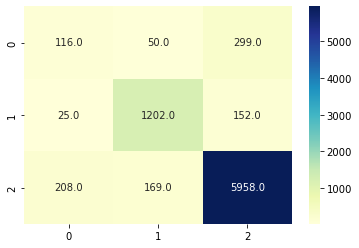

In [64]:
sns.heatmap(cm, annot=True,fmt=".1f",cmap="YlGnBu")